In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv("Fraud_Check.csv")

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.rename(columns = {'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Marital.Status':'Marital_Status'},inplace = True) ;data


,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data1= pd.get_dummies(data,columns=['Undergrad','Marital_Status','Urban']);

In [9]:
data1.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [10]:
data1["income"]="<=30000"
data1.loc[data1["Taxable_Income"]>=30000,"income"]="Good"
data1.loc[data1["Taxable_Income"]<=30000,"income"]="Risky"

In [11]:
data1

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [12]:
data1.drop(["Taxable_Income"],axis=1,inplace=True)

In [13]:
data1.head()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


In [14]:
label_encoder = preprocessing.LabelEncoder()
data1['income']= label_encoder.fit_transform(data1['income']) 

In [15]:
data1.head()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,income
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0


In [16]:
data1['income'].unique()

array([0, 1])

In [17]:
data1.income.value_counts()


0    476
1    124
Name: income, dtype: int64

In [18]:
colnames = list(data1.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES',
 'income']

In [19]:
x=data1.iloc[:,0:9]
y=data1['income']

In [20]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [22]:
x_train


,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
332,84132,1,0,1,1,0,0,1,0
13,86649,16,1,0,0,1,0,0,1
274,112584,25,0,1,0,1,0,1,0
257,31611,17,0,1,0,1,0,0,1
112,193038,26,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
440,170407,13,1,0,0,0,1,0,1
165,38463,23,0,1,0,1,0,0,1
7,131253,3,0,1,0,0,1,0,1
219,26814,9,0,1,1,0,0,1,0


# ## Building Decision Tree Classifier using Entropy Criteria


In [23]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.40000000000003, 190.26, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(66.96000000000001, 81.53999999999999, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(33.480000000000004, 27.180000000000007, 'entropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(100.44000000000001, 27.180000000000007, 'entropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(133.92000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(234.36, 135.9, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(200.88000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [291, 81]'),
 Text(234.36, 27.180000000000007, 'entropy = 0.691\nsamples = 254\nvalue = [207, 47]'),
 Text(301.

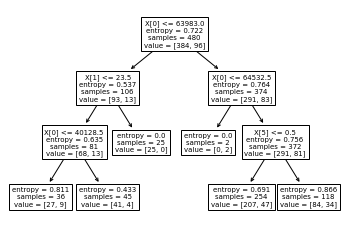

In [24]:
tree.plot_tree(model)

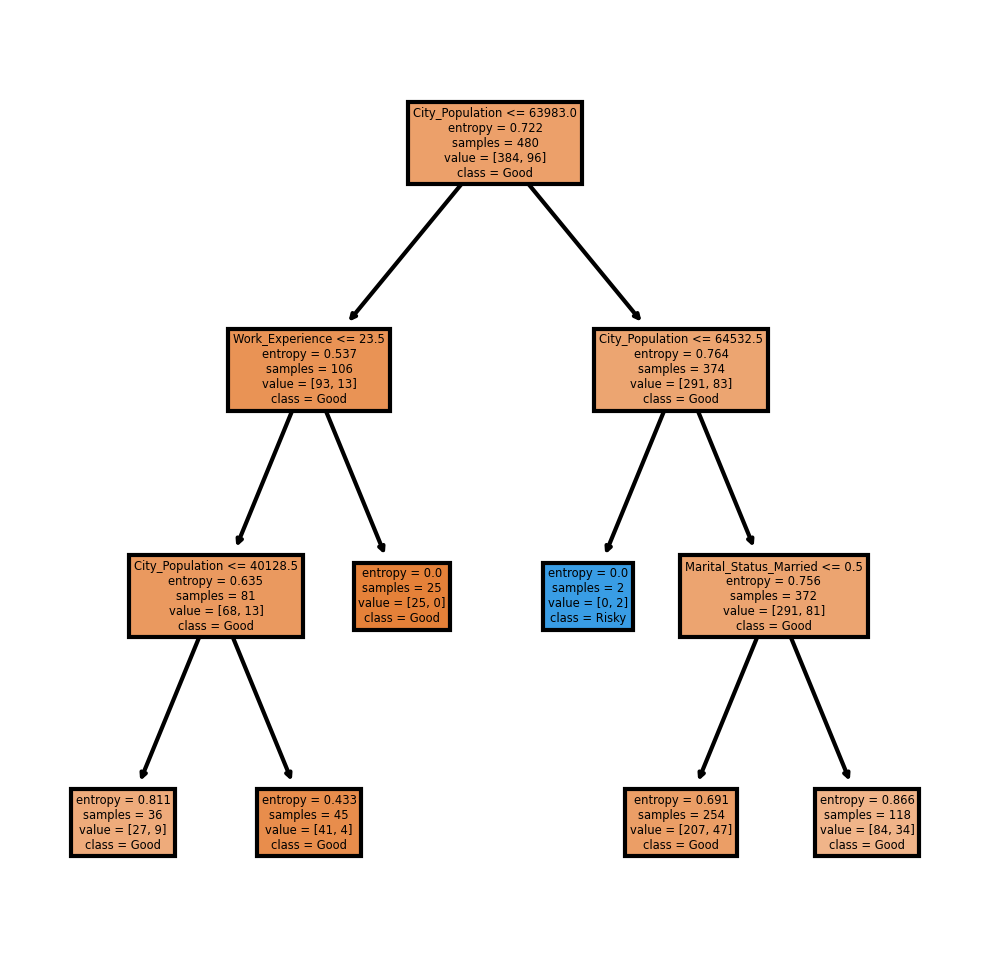

In [25]:

fn=['City_Population','Work_Experience','Undergrad_NO','Undergrad_YES','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Urban_NO','Urban_YES']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
#Predicting on test data
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

0    120
dtype: int64

In [27]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0
income,
0,92
1,28


In [29]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

# ## Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

# ## Decision Tree Regression Example


In [33]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [34]:
array = data1.values
X = array[:,0:9]
y = array[:,9]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)


In [36]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
#Find the accuracy
model.score(X_test,y_test)

-0.9577922077922074